In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

def e1(n, W, v, w, k):
    return n*W - np.sqrt(v*v + w*w + 2*v*w*np.cos(k))

def e2(n, W, v, w, k):
    return n*W + np.sqrt(v*v + w*w + 2*v*w*np.cos(k))
    
def e1v(n, W, v, w, kv):
    return [e1(n, W, v, w, i) for i in kv]
def e2v(n, W, v, w, kv):
    return [e2(n, W, v, w, i) for i in kv]

In [119]:
W = 0.3
V = 0.1
g0 = 1
delta = 00
t = 0.5
d = 1

v = g0 + delta - V*np.cos(W*t)
w = g0 - delta + V*np.cos(W*t)
kv = np.arange(-d*np.pi, d*np.pi, 0.1)

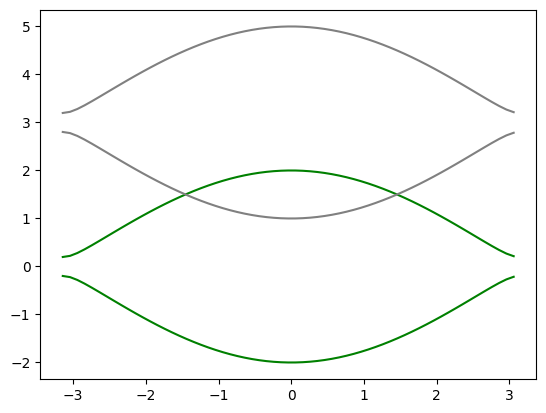

In [120]:
n=0
plt.plot(kv, e1v(n, W, v, w, kv), color='green')
plt.plot(kv, e2v(n, W, v, w, kv), color='green')
n=10
plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
plt.plot(kv, e2v(n, W, v, w, kv), color='grey')

# n=-10
# plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
# plt.plot(kv, e2v(n, W, v, w, kv), color='grey')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate

In [2]:
def H2x2(v, w, k):
    return np.array([[0, v + w*np.exp(1j*k)],[v + w*np.exp(-1j*k), 0]])
def Hnm(n, m, v, w, k, V, W):
    hnm = np.zeros((2,2), dtype=complex)
    T = 2*np.pi/W
    hnm[0,1] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    hnm[1,0] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    return hnm

In [10]:
Hnm(1, 1, 1, 1, 1, 0, 2)

array([[0.        +0.j        , 1.54030231+0.84147098j],
       [1.54030231-0.84147098j, 0.        +0.j        ]])

In [3]:
def Hf(lat, v, w, k, V, W):
    blocks = []
    for i in range(1, lat+1):
        row = []
        for j in range(1, lat+1):
            matij = Hnm(i, j, v, w, k, V, W)
            if (i==j):
                matij = matij - 2*i*W*np.eye(2,dtype=complex)
            row.append(matij)
        blocks.append(row)
    m = np.block(blocks)
    # for i in range(m.shape[0]):
    #     m[i,i] = m[i,i] - i*W
    return m

In [84]:
np.eye(2, dtype=complex)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [85]:
Hf(1, v, w, i, V, W)

array([[-2.        +0.j        ,  0.08886974+0.41211849j],
       [ 0.08886974-0.41211849j, -2.        +0.j        ]])

In [4]:
v = 1
w = 1
V = 0
W = 1
dk = 0.01

kv = np.arange(-np.pi, np.pi+dk , dk)
latsize = 3
bands = [ [] for i in range(2*latsize) ]
for i in kv:
    eigs = np.sort(la.eigvals(Hf(latsize, v, w, i, V, W)))
    for j in range(2*latsize):
        bands[j].append(np.real(eigs[j]))

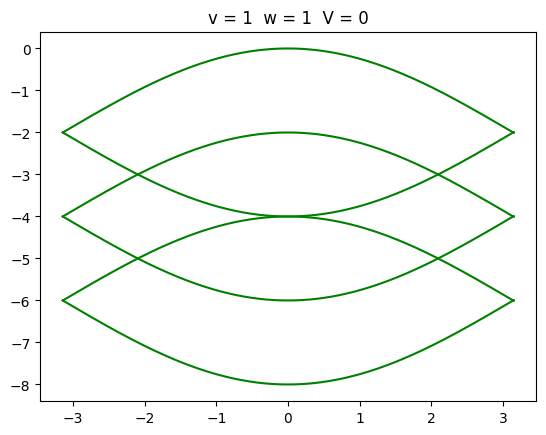

In [5]:
for i in range(2*latsize):
    plt.plot(kv, bands[i], 'green')
tit = 'v = ' + str(v) + '  w = ' + str(w) + '  V = ' +str(V)
plt.title(tit)
plt.savefig('quasiBandstucture/'+tit+'.png')